In [1]:
import pandas as pd

import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

- Caso:

    • Os dados coletados representam uma janela de 15 dias, dentro desse período ocorreu uma falha registrada no equipamento (~3hs). <br />
    • Os dados foram analisados com a intensão de buscar/encontrar/descobrir alguma anomalia, visando a antecipação do evento. <br />
    <br />

- Informação:

    • Segundo o fabricante do equipamento, o valor limite de 178bar não deveria ser ultrapassada por medida de segurança.

=============================================================================================================================================

- Case:

    • The collected data represent a 15-day window, within this period a recorded equipment failure occurred (~ 3hs). <br />
    • Data were formed with the intention of searching/finding/discovering any anomaly, filling in the anticipation of the event. <br />
    <br />

- Information:

    • According to the equipment manufacturer, the limit value of 178bar should not be exceeded for safety reasons.

In [2]:
# localizando o csv fora do folder e criando um dataframe
path = '../cola.csv'
df = pd.read_csv(path)

# removendo as últimas colunas da base de dados
df = df.iloc[:, :5]
# removendo as colunas 'machine' e 'timestamp' da base de dados
df.drop(columns=['machine', 'timestamp'], inplace=True)

# rotacionando o df para tornar os 'ids' colunas
df = df.pivot_table('value', 'packet_timestamp', 'id')

# convertendo o ts em int e depois em data
df.index = df.index.astype(str).str[:-3].astype(np.int64)
df['date'] = df.index.map(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))

# selecionando apenas as variáveis de interesse: date e pressao_max
df.index.name = None
df = df[['date', 'PressureMax_d1']]

df.head()

id,date,PressureMax_d1
1615743247,2021-03-14 14:34:07,109.0
1615752171,2021-03-14 17:02:51,109.0
1615752230,2021-03-14 17:03:50,103.0
1615752298,2021-03-14 17:04:58,101.0
1615752911,2021-03-14 17:15:11,104.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9736 entries, 1615743247 to 1617291932
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            9736 non-null   datetime64[ns]
 1   PressureMax_d1  9736 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 228.2 KB


In [4]:
df.describe()

id,PressureMax_d1
count,9736.000000
mean,125.156738
std,16.539544
min,0.000000
25%,116.000000
50%,128.000000
75%,134.000000
max,199.000000


Gráfico da Pressão Máxima no tempo
Pressure Max Time Series Chart

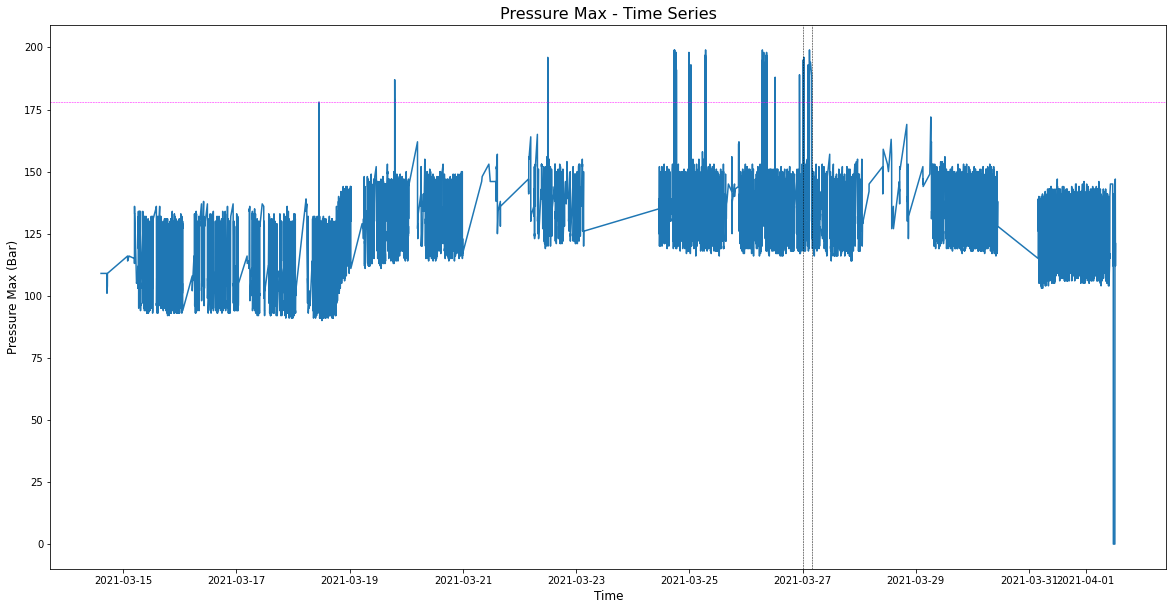

In [10]:
# Time Series Chart - Raw Data
plt.figure(figsize=(20, 10))
# Line Chart
ax = sns.lineplot(data=df, x='date', y='PressureMax_d1')
# Title and labels
ax.set_title("Pressure Max - Time Series", fontsize=16)
ax.set_ylabel("Pressure Max (Bar)", fontsize=12)
ax.set_xlabel("Time", fontsize=12)
# Add equipament trigger (magenta) and fault period (black)
plt.axhline(y=178, color='magenta', linestyle='--', lw = 0.5)
plt.axvline(x=datetime.datetime(2021, 3, 27, 0, 3, 0), color='k', linestyle='--', lw = 0.5)
plt.axvline(x=datetime.datetime(2021, 3, 27, 3, 53, 0), color='k', linestyle='--', lw = 0.5);

In [6]:
df['mm_25'] = df.PressureMax_d1.rolling(25).mean()
df['mm_50'] = df.PressureMax_d1.rolling(50).mean()
df['mm_100'] = df.PressureMax_d1.rolling(100).mean()
df.tail()

id,date,PressureMax_d1,mm_25,mm_50,mm_100
1617291720,2021-04-01 12:42:00,112.0,112.68,116.32,117.37
1617291779,2021-04-01 12:42:59,113.0,111.40,116.44,117.43
1617291813,2021-04-01 12:43:33,120.0,110.72,116.54,117.56
1617291871,2021-04-01 12:44:31,121.0,111.00,116.58,117.69
1617291932,2021-04-01 12:45:32,121.0,111.24,116.60,117.75


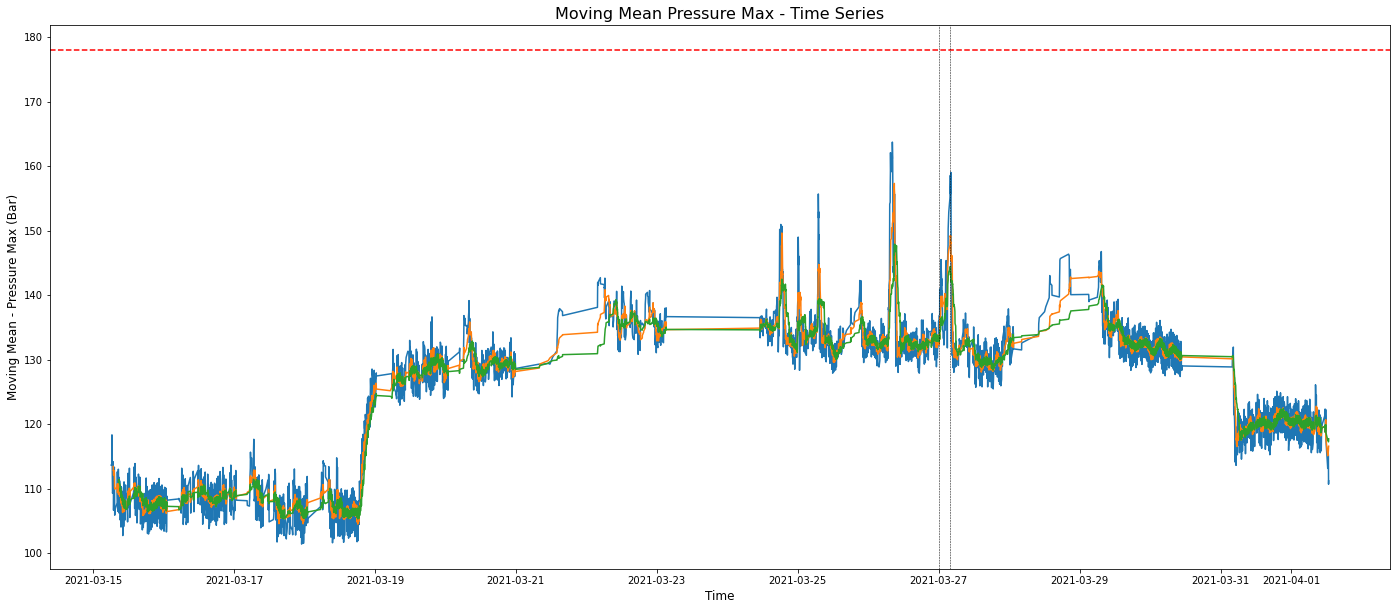

In [14]:
# Time Series Chart - Moving Mean
plt.figure(figsize=(24, 10))
# Line Chart for each movind mean
ax1 = sns.lineplot(data=df, x='date', y='mm_25')
ax2 = sns.lineplot(data=df, x='date', y='mm_50')
ax3 = sns.lineplot(data=df, x='date', y='mm_100')

# Title and labels
ax3.set_title("Moving Mean Pressure Max - Time Series", fontsize=16)
ax3.set_ylabel("Moving Mean - Pressure Max (Bar)", fontsize=12)
ax3.set_xlabel("Time", fontsize=12)

#valor maximo estipulado pelo fabricante
plt.axhline(y=178, color='r', linestyle='--')

# datetime do inicio e fim do periodo de falha
plt.axvline(x=datetime.datetime(2021, 3, 27, 0, 3, 0), color='k', linestyle='--', lw = 0.5)
plt.axvline(x=datetime.datetime(2021, 3, 27, 3, 53, 0), color='k', linestyle='--', lw = 0.5);

- Conclusão: 

    • O único motivo plausível para os valores terem chegado a 199bar, seria uma falha no trigger ou um desligamento manual. O desligamento manual pode ocorrer pois esses trigger muitas vezes desligam o equipamento automaticamente, parando a produção. Porém, não se tem evidências do ocorrido, são apenas premissas.

    • O valor médio da Pressão Máxima fica em torno de 110bar, abaixo dos 178bar estipulados. Uma subida abrupta dos valores no fim de 18-03-2021, indica uma mudança de comportamento, que iria originar uma falha/quebra 8 dias depois. Portanto, um acompanhamento dos dados, fazendo uso da técnica de média móvel, em "tempo real" seria capaz de predizer uma falha com mais de uma semana de antecidência.

=============================================================================================================================================

- Conclusion:

    • The only plausible reason for the values ​​to have reached 199bar would be a trigger failure or a manual shutdown. Manual shutdown can occur because these triggers often turn off the equipment automatically, stopping production. However, there is no evidence of what happened, they are just premises.

    • The average value of the Maximum Pressure is around 110bar, below the stipulated 178bar. A sharp rise in values ​​at the end of 18-03-2021 indicates a change in behavior, which would lead to a crash/break 8 days later. Therefore, monitoring the data, using the moving average technique, in "real time" would be able to predict a failure more than a week in advance.